## 표본분포의 이해


### 예제 4_9


In [1]:
import pandas as pd
import numpy as np
import itertools

ex4_9_pop = [6, 2, 4, 8, 10]
ex4_9_n = 2

In [2]:
ex4_9_df = pd.DataFrame(ex4_9_pop, columns=["value"])
print(ex4_9_df)

   value
0      6
1      2
2      4
3      8
4     10


In [3]:
# (1) 모집단의 평균과 분산 구하기
ex4_9_mean = ex4_9_df["value"].mean()
ex4_9_var = ex4_9_df["value"].var(ddof=0)

print(f"=== 1. 모집단 정보 ===")
print(f"모평균(μ): {ex4_9_mean}")
print(f"모분산(σ²): {ex4_9_var}")

=== 1. 모집단 정보 ===
모평균(μ): 6.0
모분산(σ²): 8.0


In [4]:
# (2-1) 모든 가능한 표본 만들기 (복원추출)
ex4_9_all_samples = list(itertools.product(ex4_9_pop, repeat=ex4_9_n))
print(ex4_9_all_samples)
print(f"샘플 수: {len(ex4_9_all_samples)}")

# 데이터프레임으로 변환
ex4_9_df_samples = pd.DataFrame(ex4_9_all_samples, columns=["1번", "2번"])

[(6, 6), (6, 2), (6, 4), (6, 8), (6, 10), (2, 6), (2, 2), (2, 4), (2, 8), (2, 10), (4, 6), (4, 2), (4, 4), (4, 8), (4, 10), (8, 6), (8, 2), (8, 4), (8, 8), (8, 10), (10, 6), (10, 2), (10, 4), (10, 8), (10, 10)]
샘플 수: 25


In [5]:
# (2-2) 각 표본의 표본평균(X_bar) 구하기
ex4_9_df_samples["X_bar"] = ex4_9_df_samples.mean(axis=1)

print("=== 2. 모든 가능한 표본과 표본평균 ===")
print(ex4_9_df_samples.head())

=== 2. 모든 가능한 표본과 표본평균 ===
   1번  2번  X_bar
0   6   6    6.0
1   6   2    4.0
2   6   4    5.0
3   6   8    7.0
4   6  10    8.0


In [6]:
# (2-3) 표본평균들의 평균과 분산 구하기
ex4_9_mean_of_xbar = ex4_9_df_samples["X_bar"].mean()
ex4_9_var_of_xbar = ex4_9_df_samples["X_bar"].var(ddof=0)

print(f"=== 3. 표본평균(X_bar)들의 통계량 ===")
print(f"표본평균들의 평균 E(X_bar): {ex4_9_mean_of_xbar}")
print(f"표본평균들의 분산 Var(X_bar): {ex4_9_var_of_xbar}")

=== 3. 표본평균(X_bar)들의 통계량 ===
표본평균들의 평균 E(X_bar): 6.0
표본평균들의 분산 Var(X_bar): 4.0


### (2-결론)

1. **평균은 같다.**
    - 표본을 아무리 많이 뽑아도, 그 평균들의 평균은 원래 데이터의 평균과 같다.

2. **분산은 작아진다.** `(모분산 / 표본크기)`
    - **모집단:** 가장 작은 값(2)과 가장 큰 값(10)이 아주 뚜렷하게 존재하며, 평균(6)에서 멀리 떨어져 있어 분산이 크다.
    - **표본평균:**
        - 평균 2가 되려면 `(2,2)`, 평균 10이 되려면 `(10,10)`으로 확률이 매우 드물어진다.
        - 반면 평균 6이 되는 경우는 `(2,10), (4,8), (6,6), (8,4), (10,2)` 등 조합이 많아 확률이 높아진다.
    - **결과:** 따라서 극단적인 값은 나오기 힘들어지고, 평균 근처에 데이터가 몰리게 되어 분산이 작아진다.


In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# (3-1) 표본평균의 도수분포표 만들기
ex4_9_freq_table = ex4_9_df_samples["X_bar"].value_counts().sort_index().reset_index()
ex4_9_freq_table.columns = ["Sample mean", "Frequency"]
ex4_9_freq_table["Probability"] = ex4_9_freq_table["Frequency"] / len(ex4_9_df_samples)
print(ex4_9_freq_table)

   Sample mean  Frequency  Probability
0          2.0          1         0.04
1          3.0          2         0.08
2          4.0          3         0.12
3          5.0          4         0.16
4          6.0          5         0.20
5          7.0          4         0.16
6          8.0          3         0.12
7          9.0          2         0.08
8         10.0          1         0.04


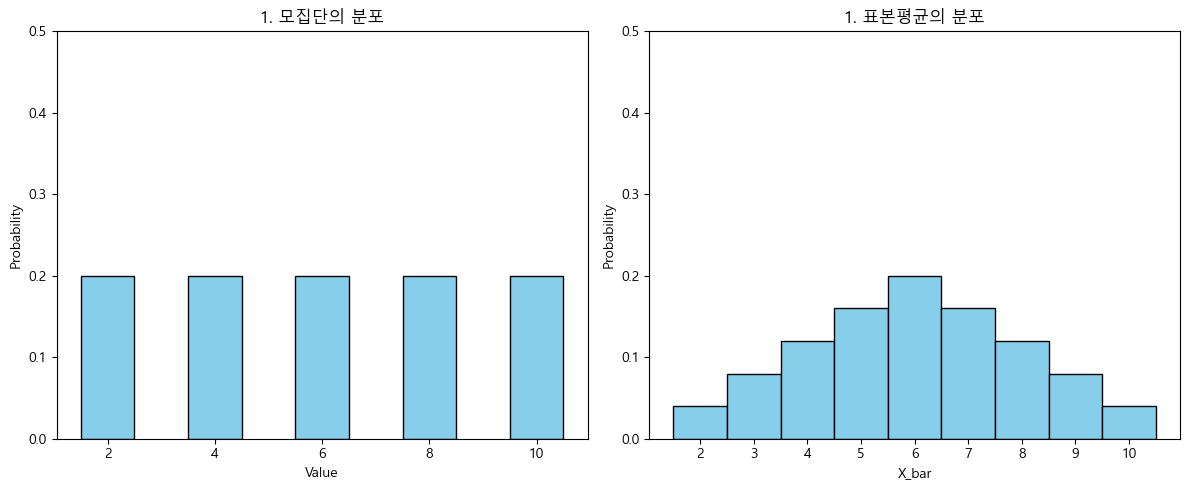

In [8]:
# (3-2) 시각화: 모집단 VS 표본평균 분포 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x_pop = [2, 4, 6, 8, 10]
y_pop = [0.2, 0.2, 0.2, 0.2, 0.2]

# 왼쪽 그래프: 모집단의 분포
axes[0].bar(x_pop, y_pop, color="skyblue", width=1.0, edgecolor="black")
axes[0].set_title("1. 모집단의 분포")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Probability")
axes[0].set_ylim(0, 0.5)
axes[0].set_xticks([2, 4, 6, 8, 10])

# 오른쪽 그래프: 표본평균의 분포
axes[1].bar(
    ex4_9_freq_table["Sample mean"],
    ex4_9_freq_table["Probability"],
    color="skyblue",
    width=1.0,
    edgecolor="black",
)
axes[1].set_xlabel("X_bar")
axes[1].set_title("1. 표본평균의 분포")
axes[1].set_ylabel("Probability")
axes[1].set_ylim(0, 0.5)
axes[1].set_xticks(ex4_9_freq_table["Sample mean"])

plt.tight_layout()
plt.show()

### 예제 4_10


In [9]:
ex4_10_X = 100
ex4_10_p = 0.05

In [10]:
ex4_10_mean = 100 * 0.05
ex4_10_var = ex4_10_mean * (1 - 0.05)

print(f"mean: {ex4_10_mean}, var: {ex4_10_var}")

mean: 5.0, var: 4.75


In [11]:
# (1-1) Numpy로 시뮬레이션 하기 (Monte Carlo Simulation): 빅데이터식 접근
trials = 100000
experiments = np.random.binomial(n=ex4_10_X, p=ex4_10_p, size=trials)

In [12]:
prob_np = np.mean(experiments <= 2)
print(f"Result Simulation: {prob_np:.4f}")

Result Simulation: 0.1174


In [13]:
# (1-2) Scipy로 계산하기
from scipy import stats

prob_sci = stats.binom.cdf(2, ex4_10_X, ex4_10_p)
print(f"이항분포 직접 계산 결과: {prob_sci:.4f}")

이항분포 직접 계산 결과: 0.1183


In [14]:
# (2-1) Numpy로 시뮬레이션 하기
count = np.sum((experiments >= 3) & (experiments <= 7))
prob_np = count / trials
print(f"Result Simulation: {prob_np:.4f}")

Result Simulation: 0.7530


In [15]:
# (2-2) Scipy로 계산하기
prob_sci = stats.binom.cdf(7, ex4_10_X, ex4_10_p) - stats.binom.cdf(
    2, ex4_10_X, ex4_10_p
)
print(f"이항분포 직접 계산 결과: {prob_sci:.4f}")

이항분포 직접 계산 결과: 0.7538


### 결론

- **교재의 답 차이 발생**
    - 1번 답: 0.0845 / 2번 답: 0.642
    - **원인:** 이항분포의 $n$이 커서 정규분포를 이용하여 **근사적으로 확률계산**을 했기 때문.

- **오차 발생 이유**
    - $Z$공식을 써서 구했지만 평균인 $np(100 \times 0.05)$가 5로, 그래프가 **Skewed(치우침)** 되어있음.
    - 따라서 정규분포로 가정했을 때 오차가 매우 큼.

- **코드 구현 팁**
    - 교재의 답을 재현하려면 `binom.cdf`(이항분포)가 아니라 `norm.cdf`(정규분포)를 사용해야 함.

- **시사점**
    - **중심극한정리의 한계**를 보여주는 아주 좋은 예시.
        > "n이 100이나 되어도, p가 너무 작아서 평균(np)이 5밖에 안 되면 정규분포 근사가 부정확할 수 있다."


### 예제 4_11


In [ ]:
# (1) ex 4_9의 표본분산 구하고 모집단의 분산과 비교
ex4_11_df_samples = pd.DataFrame(ex4_9_all_samples, columns=["1번", "2번"])
print(ex4_11_df_samples.columns)

Index(['1번', '2번'], dtype='object')


In [ ]:
# 주의: 열을 명시해주지 않으니 index까지 같이 계산됨
ex4_11_df_samples["s^2"] = ex4_11_df_samples[["1번", "2번"]].var(axis=1, ddof=1)

print("=== 표본순산이 추가된 데이터프레임 ===")
print(ex4_11_df_samples)
print(ex4_11_df_samples.columns)

=== 표본순산이 추가된 데이터프레임 ===
    1번  2번   s^2
0    6   6   0.0
1    6   2   8.0
2    6   4   2.0
3    6   8   2.0
4    6  10   8.0
5    2   6   8.0
6    2   2   0.0
7    2   4   2.0
8    2   8  18.0
9    2  10  32.0
10   4   6   2.0
11   4   2   2.0
12   4   4   0.0
13   4   8   8.0
14   4  10  18.0
15   8   6   2.0
16   8   2  18.0
17   8   4   8.0
18   8   8   0.0
19   8  10   2.0
20  10   6   8.0
21  10   2  32.0
22  10   4  18.0
23  10   8   2.0
24  10  10   0.0
Index(['1번', '2번', 's^2'], dtype='object')


In [34]:
# 표본분산 중 모분산 8과 정확하게 일치하는 값고 있고(ex4_9_var 참고), 0이나 32처럼 차이가 많이 나는 표본분산도 존재함.
# 다시 모든 표본분산의 평균을 구하면 모분산과 같은 것을 알 수 있다.
ex4_11_mean_of_s2 = ex4_11_df_samples["s^2"].mean()
print(f"표본분산 전체의 평균 E(S^2): {ex4_11_mean_of_s2}")
print(f"모집단의 분산 sigma^2: {ex4_9_var}")

표본분산 전체의 평균 E(S^2): 8.0
모집단의 분산 sigma^2: 8.0


- 모든 표본분산의 평균은 모분산과 같다


In [ ]:
# (2-1) 표본분산의 도수분포표 작성
ex4_11_freq_table = ex4_11_df_samples["s^2"].value_counts().sort_index().reset_index()
ex4_11_freq_table.columns = ["s^2", "도수"]
ex4_11_freq_table

,s^2,도수
0,0.0,5
1,2.0,8
2,8.0,6
3,18.0,4
4,32.0,2


In [ ]:
ex4_11_df_samples_total_count = len(ex4_11_df_samples)
ex4_11_freq_table["상대도수"] = (
    ex4_11_freq_table["도수"] / ex4_11_df_samples_total_count
)
ex4_11_freq_table

,s^2,도수,상대도수
0,0.0,5,0.20
1,2.0,8,0.32
2,8.0,6,0.24
3,18.0,4,0.16
4,32.0,2,0.08


In [53]:
# (2-2) 합계 행 삽입
ex4_11_print = ex4_11_freq_table.copy()

ex4_11_total_freq = ex4_11_print["도수"].sum()
ex4_11_total_prob = ex4_11_print["상대도수"].sum()

ex4_11_print.loc[len(ex4_11_print)] = ["계", ex4_11_total_freq, ex4_11_total_prob]

ex4_11_print

,s^2,도수,상대도수
0,0.0,5,0.20
1,2.0,8,0.32
2,8.0,6,0.24
3,18.0,4,0.16
4,32.0,2,0.08
5,계,25,1.00


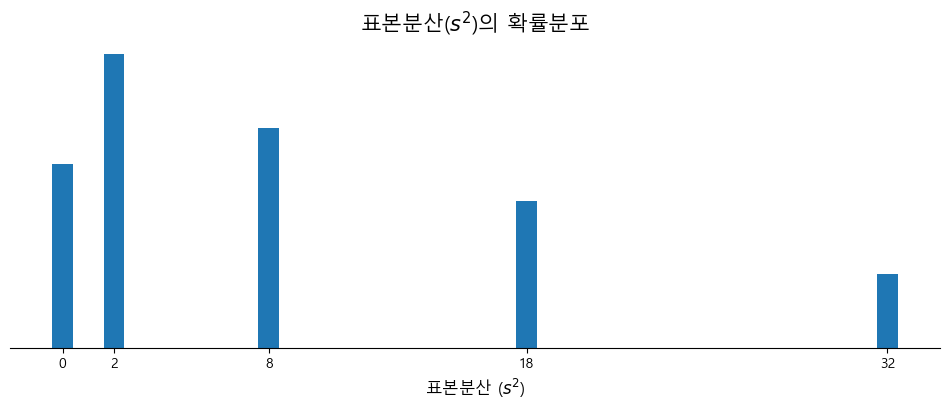

In [ ]:
# (2-3) 도수분포표 막대그래프 그리기

ex4_11_X = ex4_11_freq_table["s^2"]
ex4_11_Y = ex4_11_freq_table["상대도수"]

plt.figure(figsize=(12, 4))
bars = plt.bar(ex4_11_X, ex4_11_Y)
plt.xticks(ex4_11_X)
plt.gca().get_yaxis().set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("표본분산($s^2$)의 확률분포", fontsize=15)
plt.xlabel("표본분산 ($s^2$)", fontsize=12)
plt.show()

### 결론

- **예제 4-11의 관찰**: 표본분산의 분포는 작은 값이 많고 큰 값이 적은 **비대칭 분포**이다.
- **표본분산의 분포**: 모집단이 모분산 $\sigma^2$인 정규분포를 따를 때 크기가 $n$인 표본을 랜덤 추출하면 $(n-1)S^2/\sigma^2$은 자유도가 $(n-1)$인 $\chi^2$분포를 따른다.
